In [56]:
print("""
@Title        : 测试 MA 策略是否可以获得超额收益
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-07 20:00:16
@Description  : 基于 CSI300
"""
)


@Title        : 测试 MA 策略是否可以获得超额收益
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-07 20:00:16
@Description  : 基于 CSI300



In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
data = pd.read_csv('../data/000300.csv', index_col='Date', encoding='ANSI')
data.sample(5)

,Code,Name,Open,High,Low,Close,Change,PCT,Volume,Turnover
Date,,,,,,,,,,
2016-01-07,300,沪深300,"3,481.1500","3,481.1500","3,284.7400","3,294.3800",-245.4302,-6.9334,"44,102,641","47,130,795,628"
2013-05-03,300,沪深300,"2,457.5400","2,521.1200","2,457.5400","2,492.9100",43.2700,1.7664,"62,330,091","63,267,042,656"
2014-04-08,300,沪深300,"2,179.9200","2,243.9700","2,178.9100","2,237.3200",51.8501,2.3725,"97,219,117","85,692,893,370"
2021-08-23,300,沪深300,"4,777.7340","4,843.8190","4,764.0080","4,835.8780",66.6108,1.3967,"167,579,092","389,599,125,504"
2022-11-04,300,沪深300,"3,646.7700","3,782.8820","3,646.7700","3,767.1740",119.2781,3.2698,"149,734,948","311,145,476,096"


In [59]:
df = data[['Close']].replace(',', '', regex=True).astype(float)

In [60]:
df['rtn'] = df['Close'].apply(np.log).diff()
df.head(10)

,Close,rtn
Date,,
2005-01-04,982.79,NaN
2005-01-05,992.56,0.009892
2005-01-06,983.17,-0.009505
2005-01-07,983.96,0.000803
2005-01-10,993.88,0.010031
2005-01-11,997.14,0.003275
2005-01-12,996.75,-0.000391
2005-01-13,996.88,0.000130
2005-01-14,988.31,-0.008634


In [61]:
df['ma_5'] = df['Close'].rolling(window=5).mean().shift(1)
df['ma_10'] = df['Close'].rolling(window=10).mean().shift(1)
df = df.dropna()

In [64]:
df['position'] = np.where((df['Close'] > df['ma_5']) & (df['ma_5'] > df['ma_10']), 1, 0)
df['strategy_cum'] = (df['position'].shift(1) * df['rtn']).cumsum()

In [67]:
df['rtn'].cumsum().apply(np.exp)

Date
2005-01-18    1.007484
2005-01-19    0.999752
2005-01-20    0.988413
2005-01-21    1.015660
2005-01-24    1.031712
                ...   
2023-12-01    3.600063
2023-12-04    3.576555
2023-12-05    3.508457
2023-12-06    3.513978
2023-12-07    3.516008
Name: rtn, Length: 4590, dtype: float64

In [68]:
df['strategy_cum'].apply(np.exp)

Date
2005-01-18         NaN
2005-01-19    1.000000
2005-01-20    1.000000
2005-01-21    1.000000
2005-01-24    1.000000
                ...   
2023-12-01    4.370336
2023-12-04    4.370336
2023-12-05    4.370336
2023-12-06    4.370336
2023-12-07    4.370336
Name: strategy_cum, Length: 4590, dtype: float64

In [69]:
df['close_5'] = np.where(df['Close'] > df['ma_5'], 1, 0)
df['ma_5_10'] = np.where(df['ma_5'] < df['ma_10'], 0, 1)

In [71]:
df['position'] = df['close_5'] & df['ma_5_10']

In [72]:
(df['position'].shift(1) * df['rtn']).cumsum().apply(np.exp)

Date
2005-01-18         NaN
2005-01-19    1.000000
2005-01-20    1.000000
2005-01-21    1.000000
2005-01-24    1.000000
                ...   
2023-12-01    4.370336
2023-12-04    4.370336
2023-12-05    4.370336
2023-12-06    4.370336
2023-12-07    4.370336
Length: 4590, dtype: float64

In [74]:
df['strategy_rtn'] = df['rtn'] * df['position'].shift(1)
df['strategy_rtn_cum'] = df['strategy_rtn'].cumsum().apply(np.exp)
df['bh_rtn'] = df['rtn'].cumsum().apply(np.exp)

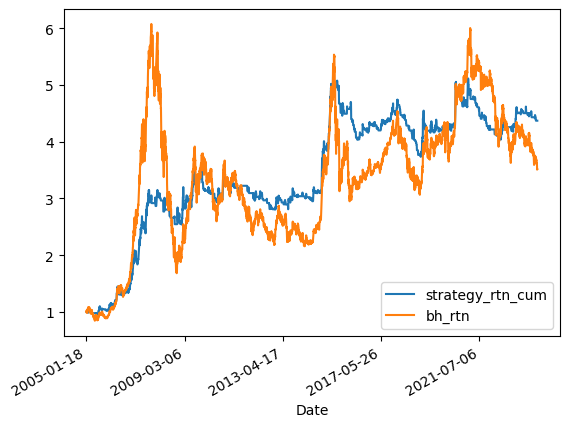

In [76]:
fig, ax = plt.subplots()
df[['strategy_rtn_cum', 'bh_rtn']].plot(ax=ax)
fig.autofmt_xdate()

In [79]:
df.to_excel('../data/rtn_csi300.xlsx', engine='xlsxwriter')

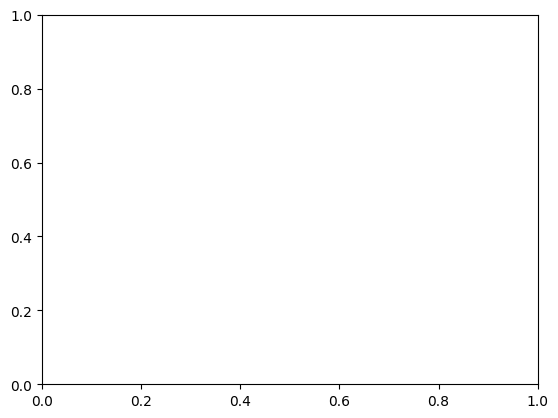

In [227]:
fig, ax = plt.subplots()
df23 = df.loc['2005-01-01':, ['Close']]
# df23.plot(ax=ax)
# fig.autofmt_xdate()

In [228]:
df23.loc[:, ['rtn']] = df['Close'].apply(np.log).diff()
df23['ma_5'] = df23['Close'].rolling(window=5).mean().shift(1)
df23['ma_3'] = df23['Close'].rolling(window=3).mean().shift(1)
df23['ma_10'] = df23['Close'].rolling(window=10).mean().shift(1)
df23 = df23.dropna()

In [241]:
df23.loc[:, ['position']] = np.where(df23['Close'] > df23['ma_5'], 1, 0)

In [242]:
# fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
# df23[['Close', 'ma_5', 'ma_10']].plot(ax=ax[0])
# df23[['position']].plot(ax=ax[1])
# fig.autofmt_xdate()
# plt.tight_layout()

In [243]:
df23.loc[:, ['rtn_cum']] = df23['rtn'].cumsum().apply(np.exp)
df23.loc[:, ['s_rtn_cum']] = (df23['position'].shift(1) * df23['rtn']).cumsum().apply(np.exp)

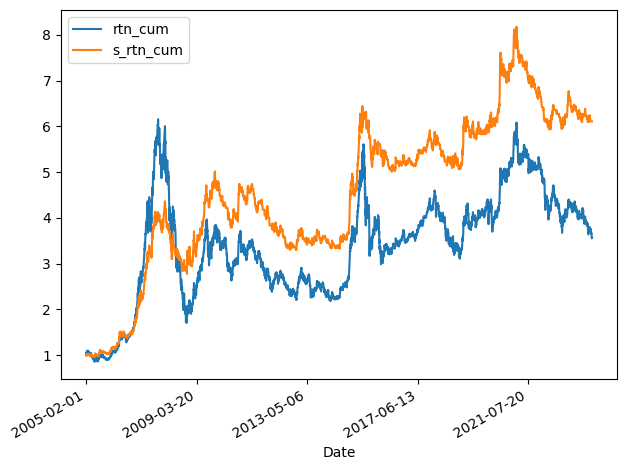

In [244]:
fig, ax = plt.subplots()
df23[['rtn_cum', 's_rtn_cum']].plot(ax=ax)
fig.autofmt_xdate()
plt.tight_layout()

In [245]:
df23.tail()

,Close,rtn,ma_5,ma_3,ma_10,position,rtn_cum,s_rtn_cum
Date,,,,,,,,
2023-12-01,3482.881,-0.003817,3510.5964,3501.010667,3538.4376,0,3.647454,6.106634
2023-12-04,3460.138,-0.006551,3499.5710,3489.130000,3529.9189,0,3.623636,6.106634
2023-12-05,3394.257,-0.019224,3489.2102,3479.740333,3518.3004,0,3.554642,6.106634
2023-12-06,3399.598,0.001572,3464.3570,3445.758667,3499.6194,0,3.560236,6.106634
2023-12-07,3401.562,0.000578,3446.6152,3417.997667,3485.1376,0,3.562293,6.106634


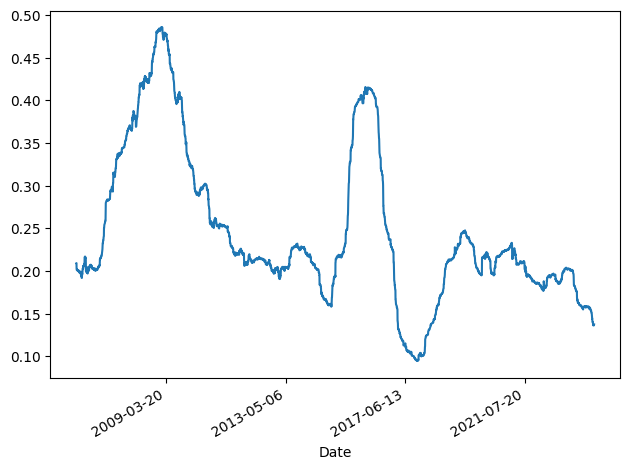

In [246]:
fig, ax = plt.subplots()
(df23['rtn'].rolling(window=252).std()*np.sqrt(252)).plot(ax=ax)
fig.autofmt_xdate()
plt.tight_layout()

In [248]:
3.56 ** (1 / 19) - 1

0.06911318136148581

In [250]:
6.11 ** (1 / 19) - 1

0.09994403787575767